# Project: AI-generated text detection 🤖
--------------------------------

**Dr. Dave Wanik - (OPIM 5512: Data Science Using Python) AND (OPIM 5509: Introduction to Deep Learning) - University of Connecticut**

Can you predict the 'ind' (0= human, 1 = AI) as a function of the 768 document embeddings, the word count and the punctuation? Be careful - there is imbalanced data which may require some advanced methods in order to get a reasonable model. Can you beat a naive (majority class) model or logistic regression? Now is your time to shine and apply everything you learned.

This project is being given to both classes simultaneously - however, you should only use the methods taught in each class. DS students must use only `sklearn` models, DL students must use `keras` models taught in class. DS students may use `XGBoost()` if they want, but this is at their own risk. `autoML` and `autokeras` may be used to fit models, but students still must be rigorous in their evaluation of the models.

Come to office hours EARLY with any questions that might pop up. See end of notebook for rubric.



*   Team Member Names: **Luis Pazmino, Nishita Rao, Sultan Gias Uddin Ahmed, Reza Rafa**
*   Group Number: **5**
* My best F1 score on the test data was: **0.704**
  * (this must match the output in your script or you are in last place! - use `f1_score(y_test, test_preds)` to check your F1 score)



Just use the `training_set.csv` file - we are ignoring the `test_set.csv` since it does not have labels. On your own, you are welcome to join the bitgrit challenge and submit your scores!

I see the highest value on November 3rd, 2023 is `f1_score = 0.675` on the leaderboard 😉

## Rubric

## 1. Exploratory Data Analysis (20 pts)
* Make five meaningful plots and tables that show you have a good command of the dataset.
  * Use a nice variety of visualizations - don't just make five word clouds.

## 2. Prepare Data for Modeling (20 pts)
* You can be creative here - do as much or as little feature engineering as you want. You can use any feature engineering or dimension reduction methods you want (**so long as there isn't data leakage - automatic last place for data leakage**.) Experimentation is key and creativity will be rewarded with up to 10 bonus points if you do something amazing.
* Please use a 90/10 split and use random seed = 42. This way we can compare who has the best `f1_score(y_test,test_preds)` results.

## 3. Models (20 pts)
You can use everything except `ID` and `ind` (the target variable) as the  inputs into your model. You should use the methods for your respective class - ML models from `sklearn` for 5512 students, DL models from `keras` for 5509 students. 5512 students should not be building neural nets, and 5509 students should not be using random forests or logistic regression! You may submit other experiments as an appendix or another notebook. Your results must be reproducible and your entire notebook must be able to run or automatic last place.

We recommend using random seeds for reproducibility:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  * Note the `random_state` argument - just set it equal to 42 or whatever your favorite number is.
* https://keras.io/examples/keras_recipes/reproducibility_recipes/
  * It is more difficult to get consistent results with keras, pay attention to this blog to get models that have reproducibility.

## 4. Evaluation (20 pts)
For train and test partition, make sure you show:
* Learning curves for accuracy and loss (if you are in the 5509 class)
* Confusion matrices
* Classification reports
* Partial dependence and permutation importance (required for 5512 students, optional but encouraged for 5509 students)
* Analysis of the classification report, with emphasis on the precision, recall and F-1 score!
* Lots of text/narrative cells that explain what you are doing - it should read like a high-level report and not just be a bunch of random code.

## 5. Discussion/Conclusion (20 pts)
* It is my expectation that you spend time working on this to get the best performing model - do not start at the last minute and just blindly copy/paste code (big points off) - really get into the details and try to get the best model you can! You should use lots of subheaders so that your project is easy to grade. Write five bullets with two or three sentences per bullet. Tell me of all of the successes and failures you had while you were modeling, and tell me why you think your model is predicting the way that it does (feel free to add some extra plots or tables here if it will help!)

# 🛷 Sliding scale for grading (like a Kaggle competition)
* You are competing with each other for your grade. The best F1 score on the test data gets a 100, and the worst team will get an 80 right off the bat. I expect everything in this notebook to be PERFECT, otherwise extra points off.



## Other resources
* https://medium.com/bitgrit-data-science-publication/can-you-detect-ai-generated-text-1f5dd3c97318
* https://deepnote.com/workspace/benthecoder-1aa3f71b-c5ea-44d1-ba14-b7fe4c5507d7/project/article-notebooks-a605a3e6-1564-47b2-94e7-842290ba7692/notebook/ai-gen-text-b5ae35203ae24e00a106db5d785b643f?
* https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/
* https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python  

# Project

##0. Importing data and libraries


### Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19

You can download the data directly from the website, HuskyCT or this gdown link.


In [ ]:
!gdown 15Nn5cRlSdd_w5z18kavsRizuGvDglGDb

Downloading...
From: https://drive.google.com/uc?id=15Nn5cRlSdd_w5z18kavsRizuGvDglGDb
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 82.5MB/s]


In [ ]:
import pandas as pd

In [ ]:
# unzip it
!unzip ai-text-competition-data.zip

# read it
df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


In [ ]:
#Assigning the dataset to datafram 'd1'
df1 = pd.DataFrame(df)

### Libraries

In [ ]:
# import modules we need for EDA and wrangling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pylab import *

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict

#import functions for sampling
from collections import Counter

# import other functions we'll need for regression modeling

from sklearn.linear_model import LogisticRegression #LogitR
from sklearn.tree import DecisionTreeClassifier #DTC
from sklearn.ensemble import RandomForestClassifier #RFC
from sklearn.ensemble import StackingClassifier #SC
from xgboost.sklearn import XGBClassifier #XGB
from sklearn.svm import SVC #SVC
from sklearn.ensemble import BaggingClassifier #BC
from sklearn.neural_network import MLPClassifier #MLP

# regression error metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# permutation testing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot
from sklearn.inspection import permutation_importance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3625 sha256=ca16ba532f0f6970d5b577653342ac730d15f6192c4776e6e9d202a84b097a22
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


##1. Cleaning the data

**As the first step, we took stock of the dataset that we are playing with. To do this, we used a few steps to check:**


* **Shape of the model - This gave a clean overview of the size of the dataset.**

* **Null values - Checked the dataset to ensure it has no missing values which may impede modelling.**

* **Data description - Reviewed statistics of the entire data set at a glance.**

* **Target indicator - Checked the breakup of the target class i.e. proportion of 1s to 0s.**





In [ ]:
print(df1.shape)
df1.head()

(11144, 772)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


In [ ]:
# Checking the names of columns in the dataframe
df1.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)

#### Checking for null values

In [ ]:
df1.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_766    0
feature_767    0
word_count     0
punc_num       0
ind            0
Length: 772, dtype: int64

#### Data description

**Reviewing the dataset at a glance.**

In [ ]:
df1.describe()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
count,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,...,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000
mean,5572.500000,0.146012,-0.273505,-0.666907,-0.415562,-0.230934,-0.270790,-0.039869,-0.037003,0.101543,...,0.274985,0.687529,0.269849,0.199639,0.443093,0.078578,-0.062243,29.978643,7.347003,0.098708
std,3217.140034,0.389374,0.382566,0.432605,0.745149,0.583487,0.388663,0.292493,0.246509,0.503054,...,0.406760,0.431843,0.545066,0.304694,0.365657,0.551214,0.300848,10.271548,4.041350,0.298283
min,1.000000,-1.633110,-1.971542,-2.505377,-4.280401,-2.413613,-1.514833,-1.427118,-1.036038,-1.779871,...,-1.765492,-1.723701,-1.506003,-1.272904,-1.467510,-1.605773,-1.085949,5.000000,0.000000,0.000000
25%,2786.750000,-0.111816,-0.517288,-0.954874,-0.891329,-0.633606,-0.536751,-0.229016,-0.197038,-0.236033,...,-0.000389,0.392865,-0.125641,0.000539,0.208861,-0.303969,-0.273816,22.000000,4.000000,0.000000
50%,5572.500000,0.161513,-0.261028,-0.673000,-0.415641,-0.244129,-0.281473,-0.036129,-0.038384,0.068244,...,0.256874,0.683075,0.213906,0.205270,0.461389,0.021472,-0.074150,30.000000,7.000000,0.000000
75%,8358.250000,0.418461,-0.016541,-0.381686,0.078408,0.168207,-0.018891,0.157572,0.117311,0.399803,...,0.535327,0.981356,0.634109,0.400167,0.692926,0.405299,0.129446,38.000000,10.000000,0.000000
max,11144.000000,1.378549,1.376324,1.392311,2.184251,1.659698,1.667419,1.070739,1.320982,2.456948,...,1.987709,1.965830,2.582598,1.375909,1.879438,2.579186,1.674109,57.000000,27.000000,1.000000


#### Breaking down the target variable

* **The target class '1' only comprises 10% of the total dataset. This is an early indication that oversampling techniques may have to be explored to ensure the target class is accurately predicted.**

In [ ]:
df1['ind'].value_counts()

0    10044
1     1100
Name: ind, dtype: int64

### Dropping 'ID'

In [ ]:
df1 = df1.drop('ID', axis = 1, inplace = True)

In [ ]:
df1 = df
df1

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,11140,0.388275,-0.776383,-1.236468,-0.090159,0.013522,-0.337909,0.057852,-0.301914,0.062450,...,1.512474,0.831832,0.745663,0.457758,0.683687,-0.016386,-0.003027,15,2,0
11140,11141,0.096468,-0.810038,-0.847827,-1.130093,-0.575835,-0.792116,-0.358161,-0.007668,-0.041767,...,-0.022681,0.207045,-0.638626,-0.147649,0.244370,-0.398683,0.193817,34,9,1
11141,11142,-0.277712,-0.822547,-0.788966,-0.783690,0.605847,-0.232772,-0.269033,0.057341,0.272056,...,0.383307,0.451840,1.565928,0.381249,0.249458,1.130406,0.863415,12,5,0
11142,11143,0.388307,-0.267300,-0.873434,-0.309149,-0.403474,-0.279639,-0.053389,0.129763,-0.021183,...,0.469792,1.477182,0.376207,0.327769,0.187805,0.098002,-0.411851,30,7,0


* **We are working with a dataset which has 11144 rows and 771 columns.**
* **As majority of the predictor columns comprised feature columns with figures contributing to the document embeddings, we decided the next step would be to use plots, tables and visualizations to support our exploratory data analysis and to understand the spread of the data.**

## 2. Visualization, Plots and Tables



### Output 1: Distribution of Word Count and Punctuation categorized by AI and Human-generated text

* **We categorized *punc_num* and *word_count* by the target variable *ind* and overlaid this mapping against the data distribution. This visualization helped us understand whether we would be working with skewed data.**

* **The distribution of *word_count* when *ind*=1 and *ind*=0, appears to be similar and is not skewed. On the other hand, the distribution for *num_punc* is skewed in one direction and the skewness carries across both values of the target variable *ind*.**

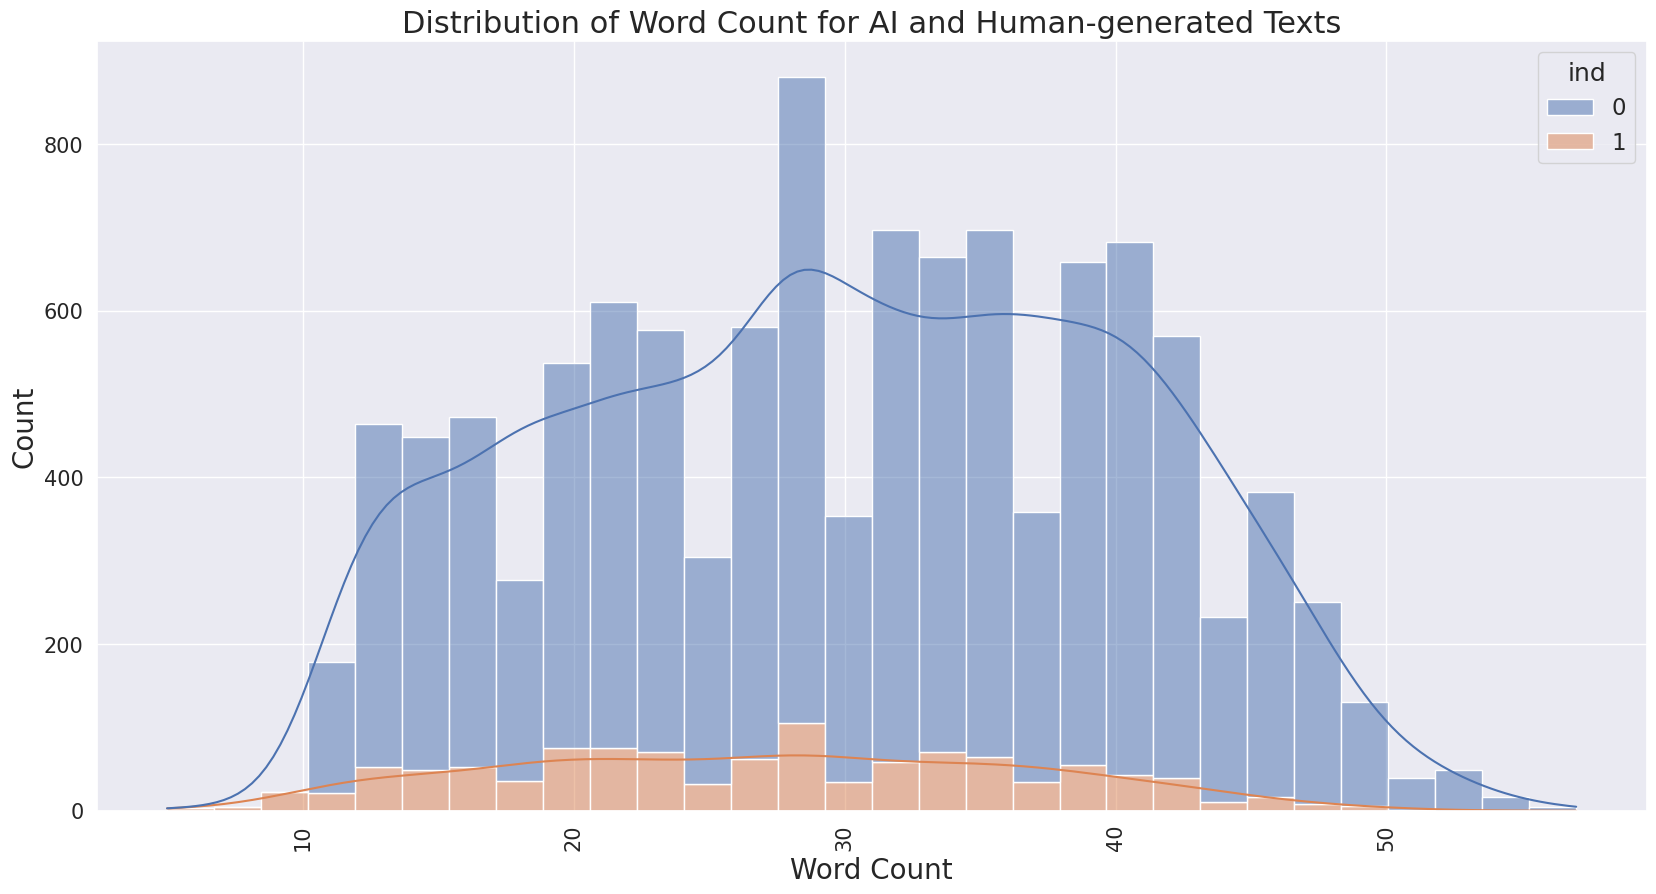

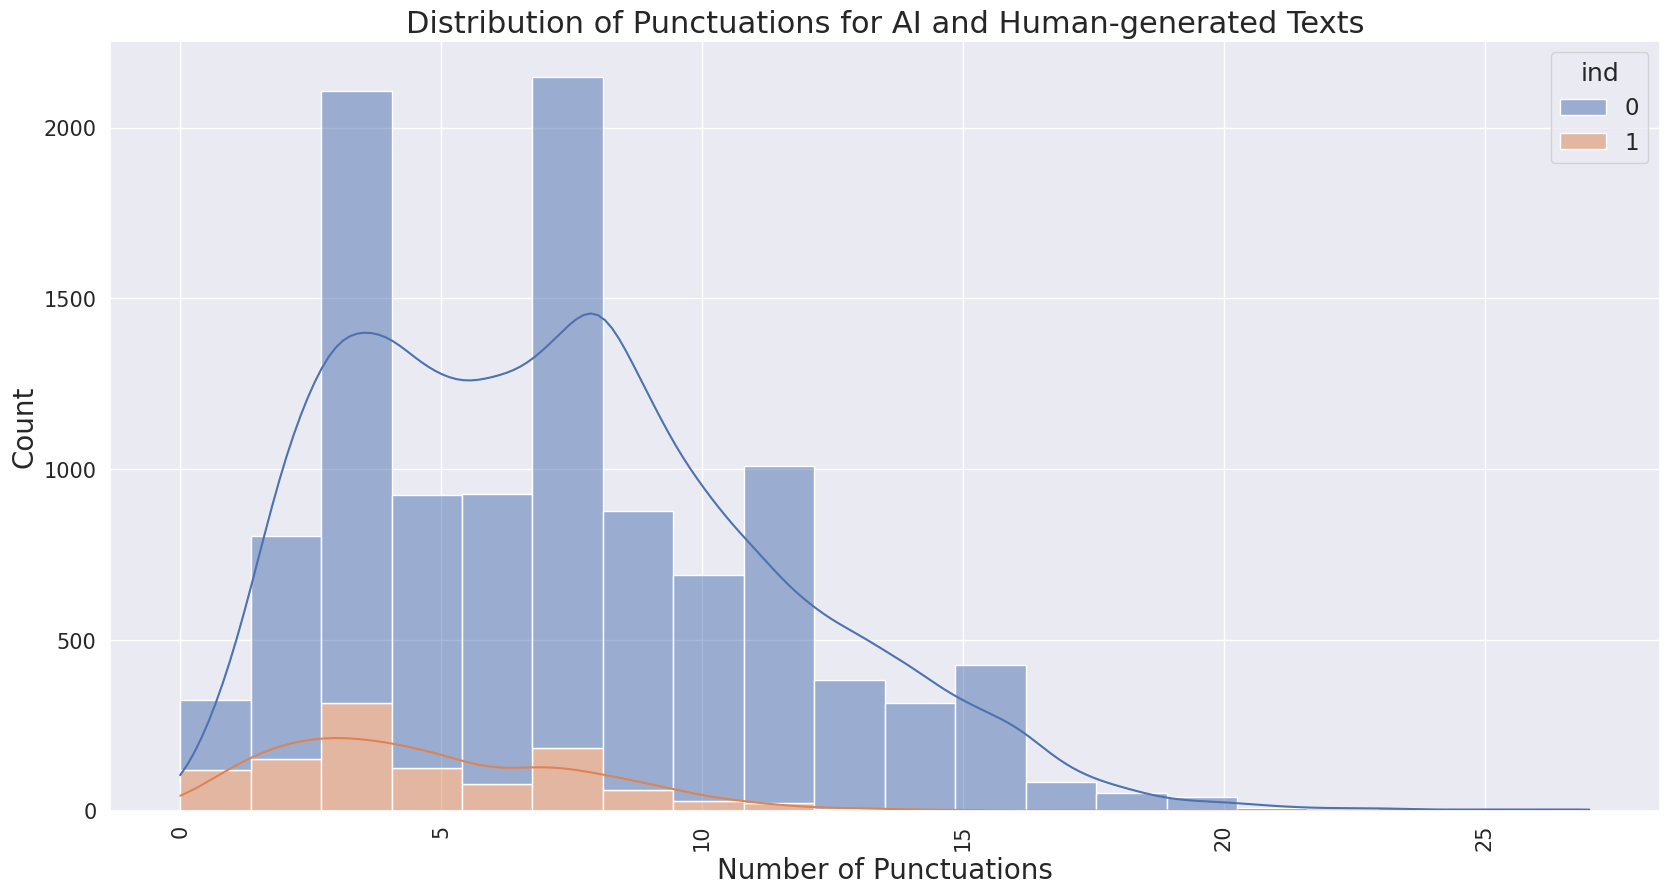

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10)) # Setting the size of the plot
sns.histplot(data=df1, x='word_count', hue='ind', multiple="stack", bins=30, kde=True)
plt.xlabel('Word Count', fontsize=20) # Setting the x-axis label
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=20) # Setting the y-axis label
plt.title('Distribution of Word Count for AI and Human-generated Texts',fontsize=22)
plt.show()

plt.figure(figsize=(20,10)) # Setting the size of the plot
sns.histplot(data=df1, x='punc_num', hue='ind', multiple="stack", bins=20, kde=True)
plt.xlabel('Number of Punctuations', fontsize=20) # Setting the x-axis label
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=20) # Setting the y-axis label
plt.title('Distribution of Punctuations for AI and Human-generated Texts', fontsize=22)
plt.show()

### Output 2: Distribution of feature variables

* **This plot gives an overview of the distribution of the 767 word embedding feature variables.**
* **Given the scale of the data, we wanted to determine the shape of the distribution and explore the predictors that we are working with in a visual manner.**

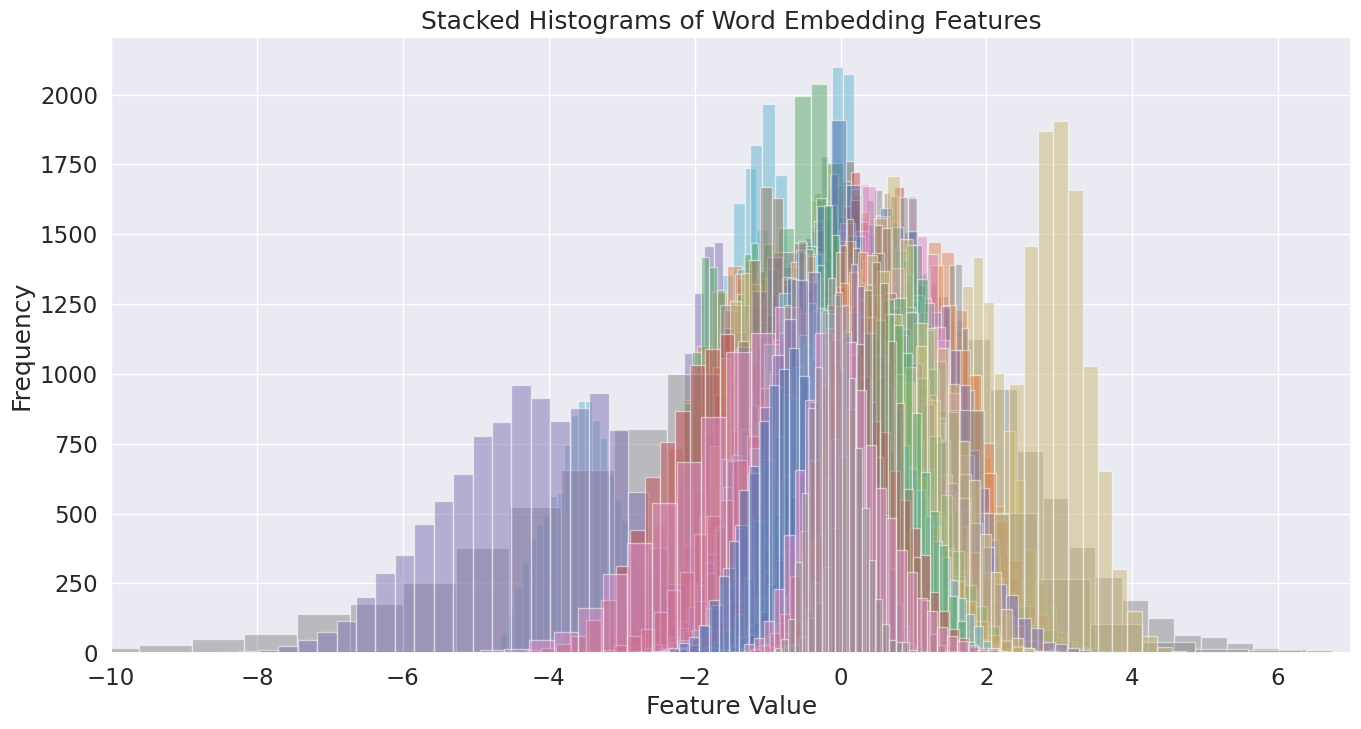

In [ ]:
# Create a subset of the data with only the feature columns
subset_data = df1[[f'feature_{i}' for i in range(0, 768)]]

# Plotting stacked histograms
plt.figure(figsize=(16, 8)) # Setting the size of the plot
plt.title('Stacked Histograms of Word Embedding Features') # setting the title for the plot, x-axis and y-axis
plt.xlabel('Feature Value')
plt.ylabel('Frequency')

# Loop through each feature and plot a histogram
for i in range(0, 768):
   plt.hist(subset_data[f'feature_{i}'], bins=30, alpha=0.5, label=f'Feature {i}', stacked=True)

plt.xlim(-10, 7) # setting the range for the x-axis limits
#plt.legend(loc='upper left')
plt.show()


### Output 3: Correlation plots on subsets of data

* **This plot explores the correlation between two predictors *punc_num* and *word_count* with the target variable ind.**
* **We observe there is some negative correlation between *punc_num* and the target variable at -0.21 relative to *word_count* which is at -0.09. This could indicate that *punc_num* could be a potential indicator in accurately identifying whether a text is human or AI-generated.**
* **Another relation that should be noted is the relation between the two predictor variables. There is moderately strong correlation at 0.41 between *punc_num* and *word_count*.**

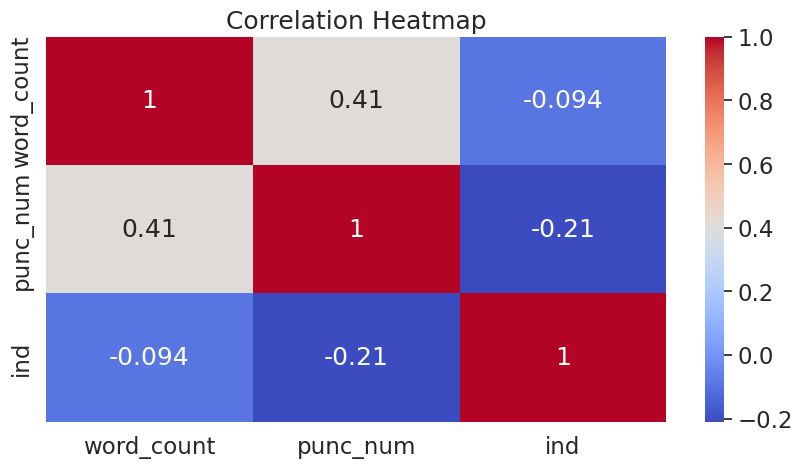

In [ ]:
included_var = ['word_count', 'punc_num', 'ind']
corr_matrix = df1[included_var].corr()

# Correlation heatmap for a subset of variables

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* **The correlation plot below explores the correlation between a subset of the dataset. We found these 10 predictors to have the highest permutation importance following the generation of our model.**

* **When viewing the correlation between the target variable and these predictors, *feature_386* and *feature_631* have a moderately strong positive correlation with the target variable *ind*.**

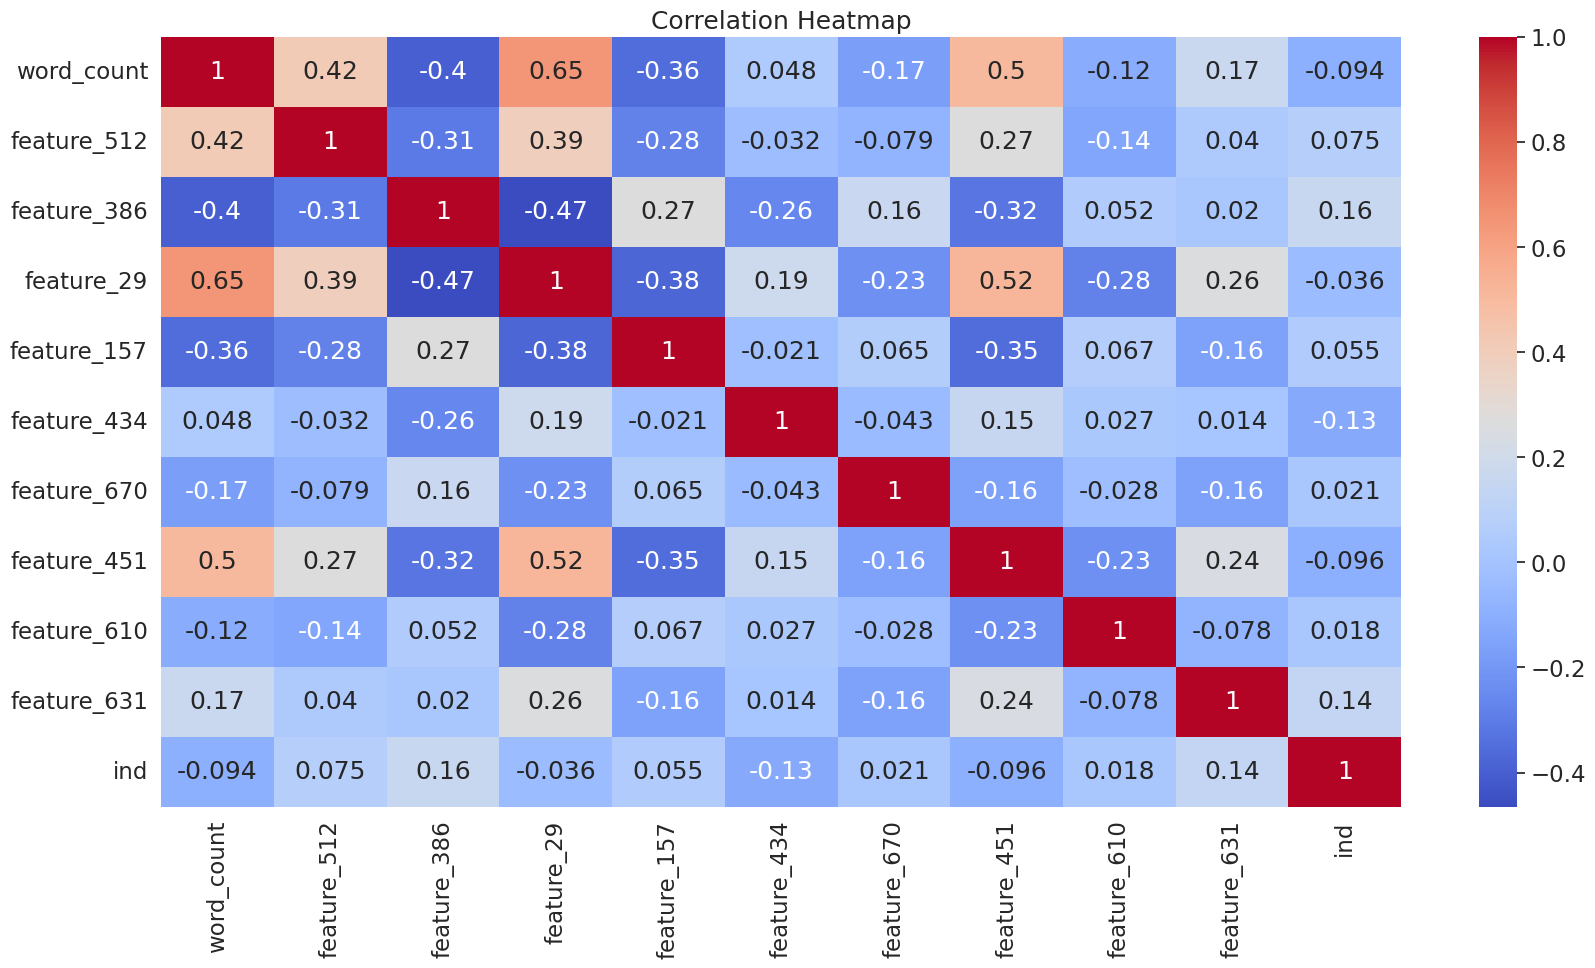

In [ ]:
included_var = ['word_count', 'feature_512','feature_386','feature_29','feature_157','feature_434','feature_670','feature_451','feature_610','feature_631','ind']
corr_matrix = df1[included_var].corr()

# Correlation heatmap for a larger subset of variables

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Output 4: Table and plot showing average number of words across number of punctuations

* **By grouping *punc_num* and *word_count*, we visualised the number of words across the different spread of punctuations in each sentence.**
* **This can determine if there is a correlation between a large number of words and large number of punctuations.**
* **The data finds that the highest number of words is linked with having approximately 23 punctuations.**



In [ ]:
# Using the groupby function and calculating the mean
tmp1 = df1.groupby(['punc_num'])['word_count'].mean()
tmp1

punc_num
0     20.115385
1     22.511785
2     23.006219
3     24.446429
4     26.069990
5     27.664502
6     29.079827
7     29.792472
8     31.601375
9     33.540387
10    34.431259
11    34.710018
12    35.666667
13    35.415144
14    35.707006
15    35.519481
16    36.723077
17    36.670588
18    37.826923
19    34.476190
20    34.750000
21    40.111111
22    36.800000
23    42.500000
24    35.000000
25    39.666667
26    36.000000
27    30.000000
Name: word_count, dtype: float64

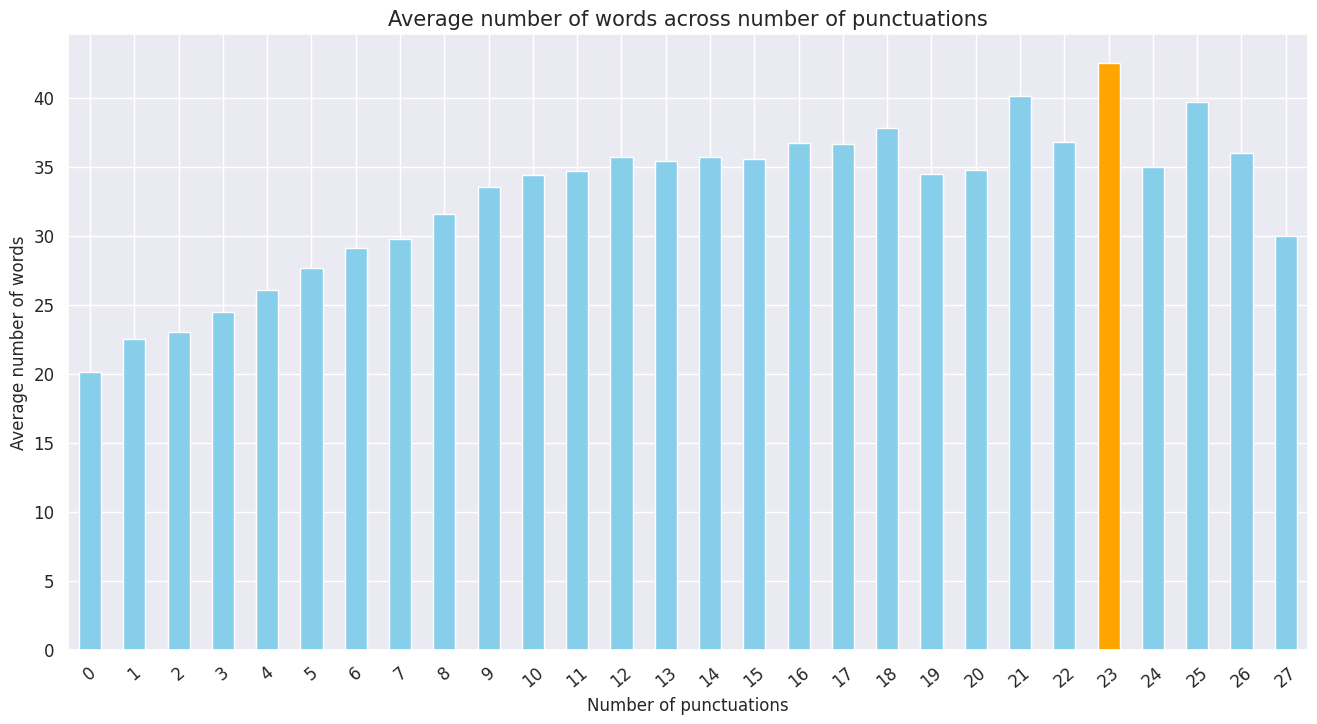

In [ ]:
#This helped us identify the number of punctuations linked with the highest average number of words
max_value_index = tmp1.idxmax()
colors = ['skyblue' if i != max_value_index else 'orange' for i in tmp1.index]

# Visual representation of table
plt.figure(figsize=(16, 8))
tmp1.plot.bar(color = colors)
plt.xticks(rotation=40, fontsize=12)
plt.xlabel('Number of punctuations', fontsize = 12)
plt.yticks(fontsize=12)
plt.title('Average number of words across number of punctuations', fontsize=15)
plt.ylabel('Average number of words', fontsize=12)
plt.show()

### Output 5: Table exploring the potential relationship between longer/lengthier documents with the target class prediction ('Ind = 1')

* **We  filtered the records to show all records with higher than average *word_count* and *punc_num* where the target variable *ind* is 1 i.e. it is a AI-generated text. We found only 111 rows meet this criteria.**
* **Potentially, there are fewer AI-orignated long/lengthy documents relative to shorter documents. This makes logical sense as longer texts may have a distinct human imprint which may not be replicated by AI.**

In [ ]:
tmp = df1[(df1["word_count"] > 30) & (df1["punc_num"] > 7) & (df1["ind"] == 1)]
tmp

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
298,299,-0.035212,-0.298080,-0.929706,-1.834547,-1.198957,-0.392879,-0.670182,-0.305916,-0.146238,...,-0.055382,0.238148,-0.824424,0.250367,0.610987,-0.148154,-0.380657,40,9,1
392,393,0.120776,-0.165842,-0.921297,-0.380259,-1.001572,-0.041320,-0.131113,-0.457045,0.191274,...,0.311176,1.154378,0.390722,-0.018302,1.130672,-0.140292,0.414682,37,11,1
571,572,0.410770,-0.280216,0.242326,0.657181,-0.141210,0.940470,-0.330804,0.093586,0.670207,...,0.875260,0.636725,1.099713,0.271288,-0.261360,0.313408,0.553665,33,9,1
590,591,-0.479998,0.213415,-0.221604,-1.989617,-1.219292,0.008831,-0.524214,-0.240857,0.410531,...,-0.012072,1.498865,-0.560651,0.049867,0.268939,-0.274079,-0.447052,44,8,1
663,664,-0.715202,-1.048458,-1.223905,-0.051260,-0.458795,0.184091,-0.042948,0.136244,0.071918,...,0.159205,0.544382,-0.057874,-0.161817,0.348788,0.409798,0.264726,34,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.252906,-0.511225,-0.817741,-1.010554,-1.063075,-0.189510,-0.356964,-0.021888,0.458587,...,-0.142276,1.281903,-0.115580,-0.117314,0.657353,-0.376937,-0.289068,39,9,1
10841,10842,0.707323,-0.254207,-0.330538,-1.814173,-0.346309,-0.899690,0.157502,0.113344,-0.272651,...,0.429724,1.504563,-0.028964,0.247994,0.367111,-0.293559,0.018091,38,9,1
10939,10940,0.250186,-0.981748,-0.597791,-1.235971,-0.965806,-0.785395,-0.835318,-0.030645,0.759294,...,0.330738,0.739985,-0.235566,0.267378,1.089044,-0.356377,0.134476,38,9,1
11068,11069,-0.402322,-0.204515,-1.097711,-2.258036,-0.828097,0.986714,-0.227133,0.205904,-0.198004,...,-0.605913,1.685176,0.038912,0.353105,0.584909,-0.946813,0.127890,49,11,1


## 3. Data partition

* **To ease the reference to predictors and the target variable, the model's predictors have been stored in a dataframe, X, and the target variable was stored in a dataframe Y.**

* **Before beggining our feature selection and model building, we partitioned our data into two sections - train and test - with a 0.9:0.1 (90%-10%). This helped ensure there was no data leakage in our resultant model.**

In [ ]:
print(df1.shape)
y = df1['ind']
X = df1.drop(['ind'], axis=1)
print(X.shape, y.shape)

(11144, 772)
(11144, 771) (11144,)


In [ ]:
X_train_split, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
print(X_train_split.shape, X_test.shape, y_train.shape, y_test.shape)
X_test

(10029, 771) (1115, 771) (10029,) (1115,)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
6118,6119,-0.353112,-0.626580,-0.903746,-0.828369,-0.782819,-0.168533,0.040119,0.217648,-0.303917,...,-0.306559,-0.299408,0.728984,-0.567680,0.339070,0.885519,-0.548074,0.184620,41,11
483,484,0.346340,-0.583017,-1.190483,-0.494768,-0.287081,-0.375951,-0.005124,0.261886,0.404331,...,-0.512823,0.249057,1.352513,0.224804,0.184705,0.591208,0.218631,-0.326882,32,10
10433,10434,0.349251,-0.489132,-0.639253,-0.908287,0.309061,-0.265567,-0.361887,0.139694,-0.403691,...,-1.208578,0.722959,1.275405,0.307952,0.171617,0.324460,0.135761,-0.145866,30,7
6983,6984,0.418454,-0.568276,-0.935845,-1.078430,-0.831121,-0.443896,-0.168880,-0.383277,-0.060650,...,-0.820033,0.528773,0.676735,-0.084451,0.707314,1.019922,-1.062582,-0.120198,28,9
5632,5633,0.491087,0.266496,-0.696401,-0.492172,-0.964150,-0.376819,0.019363,0.116966,-0.319456,...,-0.537137,0.425269,1.146217,0.002519,0.081937,0.802879,-0.282958,0.259000,30,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,10341,0.440692,0.146935,-0.620157,-1.943725,-1.142557,0.105623,0.278568,0.101012,-0.664591,...,-1.092752,0.386304,1.501351,0.091740,0.253854,0.839169,-0.455906,0.056865,37,9
9728,9729,0.080749,0.018996,-0.680842,-0.728619,-0.587746,0.319343,-0.077235,-0.788869,0.366862,...,0.074976,0.261405,1.359058,0.127359,0.588893,0.705780,-0.125182,-0.454704,43,11
3608,3609,-0.212231,-0.656301,-0.773615,-0.165566,0.479752,-0.382410,-0.213139,0.087682,0.057970,...,-0.285482,0.590697,-0.207678,0.933446,-0.120464,-0.056381,0.994538,0.035592,14,2
3485,3486,0.646393,-0.079062,-0.416048,0.070077,0.387319,-0.198685,0.298130,-0.034799,-0.695108,...,-0.824311,0.469714,0.379306,0.646830,0.356972,0.485840,0.931086,0.129991,14,8


## 4. Min-max scaler


*  **We used the min-max scaler to ensure our X data is between 0(min) and 1(max).**
*   **To avoid data leakage, we used *fit_transform()* on the train partition first and then fit on the test partition.**



In [ ]:
# To normalize the predictors and to minimize data leakage, the min-max scaler has been used

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tmp = pd.DataFrame(X_train_scaled) # Checking the resultant dataframe
tmp.describe()

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,768,769,770
count,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,...,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000
mean,0.500902,0.590908,0.507249,0.472081,0.597547,0.535932,0.391099,0.555397,0.424205,0.444010,...,0.527705,0.490576,0.653394,0.415155,0.555830,0.570356,0.402206,0.371047,0.480181,0.272214
std,0.288862,0.129570,0.113751,0.110977,0.115782,0.143187,0.122753,0.117203,0.104173,0.118769,...,0.141323,0.130578,0.117201,0.137613,0.115712,0.109333,0.131796,0.109146,0.197614,0.149231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249933,0.505138,0.433925,0.398461,0.523567,0.437043,0.306876,0.479823,0.356056,0.364678,...,0.430109,0.402711,0.573499,0.315095,0.480096,0.500727,0.311091,0.294275,0.326923,0.148148
50%,0.501032,0.596418,0.510798,0.470480,0.597644,0.532327,0.387862,0.556801,0.423012,0.436423,...,0.529583,0.484138,0.652167,0.401427,0.558110,0.575281,0.388498,0.366800,0.480769,0.259259
75%,0.751503,0.681819,0.584197,0.545475,0.674750,0.633869,0.470300,0.634702,0.489173,0.514177,...,0.627810,0.573869,0.732970,0.507590,0.631982,0.644586,0.479953,0.440178,0.634615,0.370370
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Feature Engineering

* **Our dataset has 768 features comprising document embeddings. This indicates feature engineering should be explored in order to maximize the information that could be gleaned and processed by the model.**

* **We employed several feature engineering techniques in our exploration (more details included in the Appendix).**

* **To arrive at our most optimum model, we used the feature importance technique by building a simple Random Forest model using the *Random Forest Clasifier*. This enabled us to choose the top 70% of the most important features for further modelling.**

* **To ensure that the same set of features were used when making predictions on both the train and the test partition, two new variables were created, namely *X_train* and *X_test*.**

### Feature Importance (Using the Random Forest Classifier)

In [ ]:
# Initializing and fitting the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Getting feature importances
importances = model.feature_importances_

# Sorting features by their importance
sorted_indices = np.argsort(importances)[::-1]

# Selecting a subset of the most important features
n_top_features = int(len(sorted_indices) * 0.7)
top_feature_indices = sorted_indices[:n_top_features]

# Selecting the top features from X_train_scaled and X_test_scaled
X_train = X_train_scaled[:, top_feature_indices]
X_test = X_test_scaled[:, top_feature_indices]

In [ ]:
# Get the column names of the top features
top_feature_names = X_train_split.columns[top_feature_indices]

# Create the reduced dataset by selecting only the top features from the original X_train
# This helped us retain the column names
X_train_reduced = X_train_split[top_feature_names]

In [ ]:
X_train_reduced

,feature_44,feature_574,feature_283,feature_81,feature_135,feature_25,word_count,feature_365,feature_682,feature_265,...,feature_683,feature_735,feature_708,feature_351,feature_746,feature_514,feature_230,feature_499,feature_77,feature_470
11043,0.988690,-4.325980,-1.163453,0.361765,-0.290846,0.125387,34,0.303245,-0.783357,-0.196680,...,0.156029,0.295550,1.677915,-1.038080,-0.088477,-0.319267,0.544500,0.480949,-0.329576,-1.625106
4165,1.649150,-5.524736,0.048007,0.343817,-0.072862,-0.277112,15,1.075670,-0.655289,-0.797541,...,1.012332,-0.446341,2.304675,-1.592107,-0.105811,-0.296177,0.349353,0.388002,-0.704178,-0.470036
6844,1.609025,-4.092828,-0.758941,0.504459,-0.493126,-0.440609,28,0.227825,-0.534901,0.524839,...,0.523494,0.561507,0.538439,-1.330692,-0.654012,0.099984,0.489611,0.224698,0.146112,-0.793266
3287,-0.026881,-2.094761,-0.987697,0.278417,-0.146736,0.196367,41,0.240167,-0.019860,0.083068,...,0.456848,-0.218490,1.038392,-1.006626,-0.135052,-0.619513,0.098216,0.302758,-0.646471,-0.162275
4098,0.771990,-5.139608,0.509669,0.867823,0.071870,-0.165448,17,0.508685,-0.002699,-0.610319,...,0.735145,-0.263906,-0.193235,-1.385143,0.130141,-0.220823,0.108707,0.402521,-0.321634,-0.514600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.583844,-5.516162,0.059457,0.503780,-0.027285,0.098391,50,-0.375355,-0.112810,0.333445,...,0.691976,0.066450,0.972411,-1.004279,0.115198,-0.118283,0.620806,0.530141,0.613966,-0.368107
5191,1.713616,-4.701593,-0.081153,0.722944,-0.569876,0.165418,20,0.409653,-0.628010,0.115641,...,0.200848,0.171456,0.713142,-1.268799,-0.511081,-0.159382,0.084504,0.149147,-0.345109,-0.804252
5390,0.275144,-2.323520,-0.079361,-1.103603,-0.056304,-0.776368,12,1.076939,0.456279,0.468365,...,1.496682,-0.351726,0.867049,-1.256432,1.514457,-0.370354,-0.397055,0.564906,-1.217802,1.079386
860,1.826189,-3.144795,-1.305825,0.316977,-0.263177,0.128601,28,0.415705,-1.069574,-0.279683,...,0.086208,1.472056,0.733446,-1.052104,-0.187207,-1.606506,-1.025543,1.063484,-0.198854,-0.396986


In [ ]:
# Checking the number of columns/predictors
print("After reducing the number of predictor columns using feature selection, the number of columns we work with is:",len(X_train[1]))

After reducing the number of predictor columns using feature selection, the number of columns we work with is: 539


## 6. Modeling

*   **We explored several different models with the objective of getting the highest F-1 score with the most interpretable results.**
*   **Our best model was a stacking ensemble model which combined results from five base models - Random Forest Classifier, Support Vector Classifier, Decision Tree Classifier, Bagging Classifier and Multi-layer Perceptron - using a Logistic Regression model.**
* **Additionally, five-fold cross validation technique was used to assess the performance and generalization ability of the model's results. It helped in obtaining a more reliable estimate of the model's performance by reducing the impact of the specific choice of the training sets.**



### Stacking Ensemble Model

In [ ]:
# Initializing the base models

base_models = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500,random_state=42))
]

final_model = LogisticRegression() # Initializing the final model

stacked_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

# Cross-validated predictions for training data with five-fold cross-validation
y_train_pred = cross_val_predict(stacked_model, X_train, y_train, cv=5, n_jobs=-1)

# Training the model on the full training set and evaluate on the test set
stacked_model.fit(X_train, y_train)
y_test_pred = stacked_model.predict(X_test)

#### Performance metrics

In [ ]:
# Classification report for the train set
trainreport = classification_report(y_train, y_train_pred)
print("Classification Report on Train Set:\n", trainreport)

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

# Calculating metrics for the training set based on cross-validation
cv_accuracy = accuracy_score(y_train, y_train_pred)
cv_f1 = f1_score(y_train, y_train_pred)
cv_recall = recall_score(y_train, y_train_pred)
cv_precision = precision_score(y_train, y_train_pred)

# Print the results for the training set
print(f"Training Set (CV) - Accuracy: {cv_accuracy:.2f}, F1 Score: {cv_f1:.2f}, Recall: {cv_recall:.2f}, Precision: {cv_precision:.2f}")

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      9034
           1       0.84      0.59      0.69       995

    accuracy                           0.95     10029
   macro avg       0.90      0.79      0.83     10029
weighted avg       0.94      0.95      0.94     10029

TP: 583
TN: 8923
FP: 111
FN: 412
Training Set (CV) - Accuracy: 0.95, F1 Score: 0.69, Recall: 0.59, Precision: 0.84


In [ ]:
# Classification report for the test set
testreport = classification_report(y_test, y_test_pred)
print("Classification Report on Test Set:\n", testreport)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

# Calculating metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"Test Set - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}")

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1010
           1       0.87      0.58      0.70       105

    accuracy                           0.95      1115
   macro avg       0.91      0.79      0.84      1115
weighted avg       0.95      0.95      0.95      1115

TP: 61
TN: 1001
FP: 9
FN: 44
Test Set - Accuracy: 0.95, F1 Score: 0.70, Recall: 0.58, Precision: 0.87


**Analysis of Model's results:**

* **Based on the above classification report of the test partition, the model performance metrics can be summarized as follows:**

    **1.   F-1 Score: 0.70**
    
    **2.   Precision: 0.87**
    
    **3.   Recall: 0.58**

* **While the F-1 score can still be improved, the precision score is quite high at 0.95 (95%). This indicates the proportion of true positives identified relative to the total number of true positives and false positivies. Therefore, this is a measure of the actual positives identified by the model.**
* **On the other hand, the recall score is quite low at 0.58(58%). This refers to the proportion of true positives identified relative to the total number of true positives and false negatives.**
* **Notably, this model performs even better when all parameters are retained as predictors and yields a higher F-1 score (0.71). However, we did not select this model to the fact that it yielded a lower precision score (0.85) i.e. the model's accurate predictions of the target class is lower(More details in the appendix).**


## 7. Interpretability

### Permutation Importance

In [ ]:
# Get the column names of the top features
top_feature_names = X.columns[top_feature_indices]

# Create the reduced dataset by selecting only the top features from the original X
X_reduced = X[top_feature_names]
X_reduced

,feature_44,feature_574,feature_283,feature_81,feature_135,feature_25,word_count,feature_365,feature_682,feature_265,...,feature_683,feature_735,feature_708,feature_351,feature_746,feature_514,feature_230,feature_499,feature_77,feature_470
0,1.682048,-5.608660,0.237722,1.015449,-0.416592,-0.231725,25,0.236141,0.493486,0.210561,...,0.280980,-0.333547,-0.133674,-1.227102,-0.172932,0.455715,0.449718,0.830852,0.189246,-0.021208
1,1.441186,-2.739720,-1.156624,-0.081763,-0.948799,-0.334324,23,1.031491,-0.689348,0.548762,...,0.741734,0.054711,0.621652,-0.981173,-0.447287,-0.417052,-0.311425,0.054548,-0.304018,-0.069663
2,1.690356,-3.988169,0.370875,0.329164,-0.472987,-0.133322,29,1.037845,-0.486289,-0.149496,...,0.361591,0.043381,0.719166,-1.103784,0.433587,0.361820,0.332582,0.357184,-0.276913,0.146825
3,0.401093,-3.886840,-0.879337,-0.172091,-0.632622,-0.523170,14,1.233619,-0.134516,-0.810213,...,1.011119,0.322318,1.465744,-1.476275,0.324955,-0.588577,-0.202372,0.986504,-0.708044,0.309942
4,0.764308,-3.950183,-0.358921,0.391113,-0.062527,-0.015837,35,0.322910,0.055061,-0.023343,...,0.310211,0.109765,0.776897,-0.620467,0.066628,0.007329,-0.064747,0.591355,0.034078,-0.623769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,1.318787,-3.822130,-1.529990,1.258776,-0.908731,-0.325718,15,0.125616,-0.145428,-0.105938,...,0.623506,0.236247,1.738617,-1.887263,-0.227580,-0.578829,0.115062,0.763977,-0.463297,-0.947457
11140,0.231907,-3.738407,-1.487698,0.571586,-0.556311,0.230196,34,0.180468,-0.267984,-0.146624,...,0.534349,0.871084,1.172481,-0.742700,-0.327960,-0.598562,1.122969,0.114656,-0.452739,-1.206279
11141,0.346082,-3.279221,-0.855531,0.116029,-0.076869,0.076993,12,1.143490,0.472425,-0.514132,...,0.925023,-0.117146,1.027353,-0.708334,0.136176,-0.599769,-0.571841,0.711126,-0.876111,0.969803
11142,1.724014,-4.133444,-0.160880,0.812145,-0.777671,-0.269232,30,0.028417,-0.080773,0.193493,...,0.162493,-0.172320,0.385974,-1.697326,-0.415370,-0.820570,0.181914,0.235852,0.135702,-0.840133


In [ ]:
# Running permutation importance
result = permutation_importance(stacked_model, X_test, y_test, scoring='f1', n_repeats=15, random_state=42)

# Printing the importances
perm_importances = result.importances_mean
perm_importances_sorted_idx = np.argsort(perm_importances)[::-1]

In [ ]:
# To identify the top important parameters for further analysis, the feature importance values were printed out
for idx in perm_importances_sorted_idx:
    print(f"{X_reduced.columns[idx]}: {perm_importances[idx]}")

word_count: 0.01994862152336884
feature_512: 0.016069822383835697
feature_386: 0.014370948299590847
feature_29: 0.013251447110095071
feature_157: 0.012884800878663541
feature_434: 0.01258674153971994
feature_670: 0.012513388035496531
feature_451: 0.012268125214433287
feature_610: 0.012008438198276416
feature_631: 0.011817723909986899
feature_686: 0.011533054282107455
feature_35: 0.010950292180212018
feature_603: 0.01063481394708703
feature_353: 0.010522851420242096
feature_426: 0.010374177114900443
feature_528: 0.010023975625729624
feature_617: 0.010001577020090753
feature_272: 0.009963197112100083
feature_164: 0.009959025249919873
feature_592: 0.009884804027958364
feature_718: 0.009663281489461642
feature_265: 0.009620483984522555
feature_204: 0.00957423206565345
feature_49: 0.00951902578850951
feature_582: 0.009513254933226996
feature_288: 0.009492449481287387
feature_80: 0.009419568867790992
feature_612: 0.009267993583720073
feature_59: 0.009189341505665216
feature_146: 0.0090651306

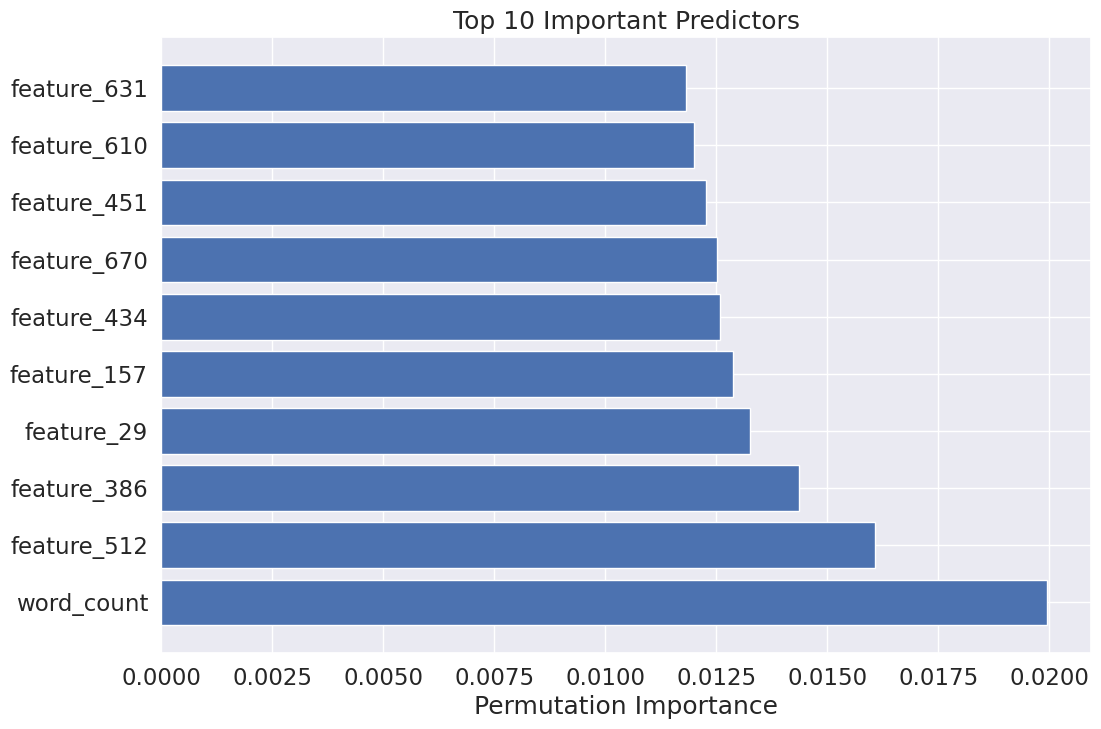

In [ ]:
# Selecting the top 10 most important predictors
top_10_predictor_indices = perm_importances_sorted_idx[:10]
top_10_predictors = X_reduced.columns[top_10_predictor_indices]

# Creating a bar plot for the top 10 predictors
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_predictors)), [perm_importances[idx] for idx in top_10_predictor_indices], align='center')
plt.yticks(range(len(top_10_predictors)), top_10_predictors)
plt.xlabel('Permutation Importance')
plt.title('Top 10 Important Predictors')

plt.show()

### Partial Dependence


**Creating partial dependence plots for the top 3 predictors that contribute the most to the model. These are:**


*  **Word_count**
*  **Feature 512**
*  **Feature 386**


In [ ]:
# Creating another dataframe for further analysis
X_train_top = pd.DataFrame(X_train, columns=X_train_reduced.columns)
X_train_top.head()

,feature_44,feature_574,feature_283,feature_81,feature_135,feature_25,word_count,feature_365,feature_682,feature_265,...,feature_683,feature_735,feature_708,feature_351,feature_746,feature_514,feature_230,feature_499,feature_77,feature_470
0,0.492635,0.556529,0.318785,0.457166,0.469994,0.676828,0.557692,0.381123,0.502201,0.504710,...,0.448667,0.534298,0.757156,0.426345,0.439617,0.429521,0.631118,0.531747,0.439679,0.205976
1,0.671670,0.406590,0.580374,0.452540,0.539477,0.520412,0.192308,0.548935,0.530647,0.337617,...,0.737372,0.371940,0.871679,0.301671,0.434730,0.435477,0.585777,0.496727,0.334359,0.449131
2,0.660793,0.585691,0.406131,0.493941,0.405517,0.456876,0.442308,0.364738,0.557388,0.705357,...,0.572559,0.592502,0.548947,0.360498,0.280174,0.537665,0.618365,0.435198,0.573419,0.381088
3,0.217338,0.835607,0.356736,0.435685,0.515929,0.704411,0.692308,0.367419,0.671789,0.582505,...,0.550089,0.421804,0.640300,0.433423,0.426486,0.352073,0.527426,0.464610,0.350584,0.513918
4,0.433893,0.454761,0.680061,0.587588,0.585610,0.563806,0.230769,0.425755,0.675600,0.389681,...,0.643918,0.411865,0.415253,0.348245,0.501253,0.454914,0.529864,0.502198,0.441912,0.439750


In [ ]:
# Checking the shape of the dataframe
X_train_top.shape

(10029, 539)

#### Word Count

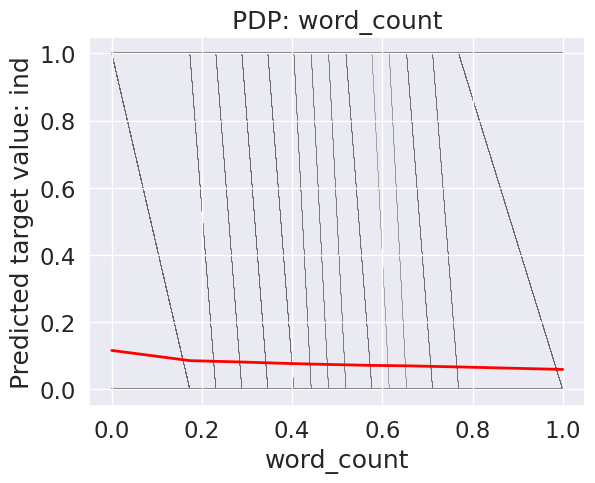

In [ ]:
# Creating the ICE partial dependence plot for Word count
tmpdf1 = ice(data=X_train_top, column='word_count',
                   predict=stacked_model.predict,
            num_grid_points=15)

ice_plot(tmpdf1, c='dimgray', linewidth=0.1,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 2, 'color':'red'})
plt.title('PDP: word_count')
plt.ylabel('Predicted target value: ind')
plt.xlabel('word_count');
plt.show()

#### Feature 512

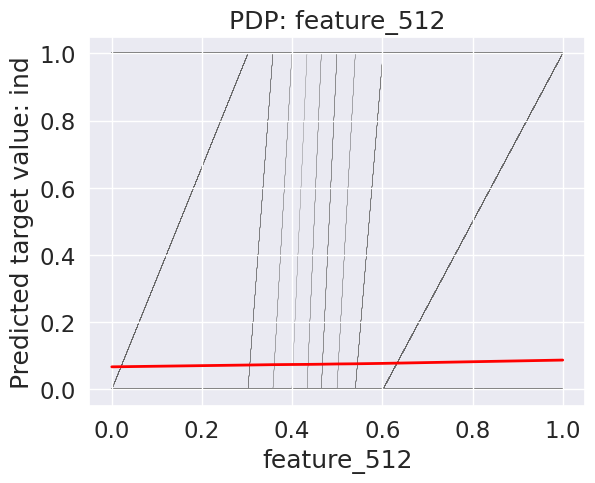

In [ ]:
# Creating the ICE partial dependence plot for Feature 512
tmpdf3 = ice(data=X_train_top, column='feature_512',
                   predict=stacked_model.predict,
            num_grid_points=10)

ice_plot(tmpdf3, c='dimgray', linewidth=0.1,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 2, 'color':'red'})
plt.title('PDP: feature_512')
plt.ylabel('Predicted target value: ind')
plt.xlabel('feature_512');
plt.show()

#### Feature 386

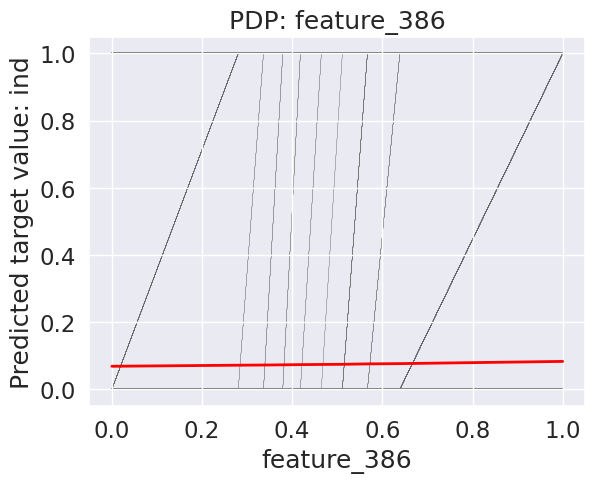

In [ ]:
# Creating the ICE partial dependence plot for Feature 386
tmpdf2 = ice(data=X_train_top, column='feature_386',
                   predict=stacked_model.predict,
            num_grid_points=10)

ice_plot(tmpdf2, c='dimgray', linewidth=0.1,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 2, 'color':'red'})
plt.title('PDP: feature_386')
plt.ylabel('Predicted target value: ind')
plt.xlabel('feature_386');
plt.show()

# 8. Conclusions


**Observation 1:**

The first observation was that if we used feature section methods like Random Forest classifiers, Principal Components Analysis (PCA), Boruta shadow variables, and K-best feature selection, we get a lower F-1 score. This is because the model cannot capture the entire trend of the dataset and could also be due to loss of information. However, if we retained all the parameters as predictors and run our models, the computational time was quite high. It was an interesting challenge to balance the trade off between interpretability and computational time.




**Observation 2:**

The second observation made was related to oversampling. We chose to not use Synthetic Miniority Over-sampling Technique (SMOTE) to balance the classes in this classification problem. It was initially considered because the target class (1) was not proportional to the other class (0) in the target variable.However, we chose to not proceed with the SMOTE technique because we observed that it created synthetic data which added noise in the model. This reduced the model performance metrics such as the F-1 score, accuracy and precision, ultimately reducing the accurate predictions of the target variable.



**Observation 3:**

The third observation is the role played by *word_count* in as an important feature in our final model. During the EDA exploration, we found both *punc_num* and *word_count* to have a moderately strong positive correlation to the target variable. Upon completing our permutation importance analysis, we found *word_count* played a key role as the most important contributor in predicting the target variable. Potentially, *punc_num* does not feature in the list as it has a strong positive correlation with *word_count*.


**Observation 4:**

The fourth observation was about the model's interpretability. The partial dependece plot for *word_count* indicates that higher the value of *word_count*, there is a greater chance of the target variable being 1 i.e. AI-originated. This finding is in contrast to the observations made during EDA (Output 5). The opposite can be noted for *feature_512* and *featue_386* wherein higher the value of the predictor, higher the chance of the target variable being 0 i.e. human-originated.





**Observation 5:**

The final observation we made was that a single model by itself would not yield a F-1 score higher than 0.68. This was likely due to the fact that the information captured from the complex dataset was limited. Our success lay in the fact that we combined results from multiple models using a stacking ensemble which boosted the accuracy of the target class prediction. The only drawback to our approach is the loss of interpretability that is associated with ensemble models.

# 9. Appendix - Alternative approaches



The goal of the project was to optimize the F-1 score and get the best score in the test partition. To achieve this goal, we explored many approaches which are outlined in the Appendix.


##Approach 1

Using all the parameters as predictors and building Ensemble Stacking Classifier model gave the results as below.

One alternative approach that we took was using an Ensemble Stacking model. The base models considered were Random Forest Classifier, Support Vector Classifier, Decision Tree Bagging Classifier, and Multilayer Perceptron (MLP) Classifier. We ran the model without using any feature engineering to select important  features or reducing the dimensionality. This resulted in us getting an F-1 score of 0.71.

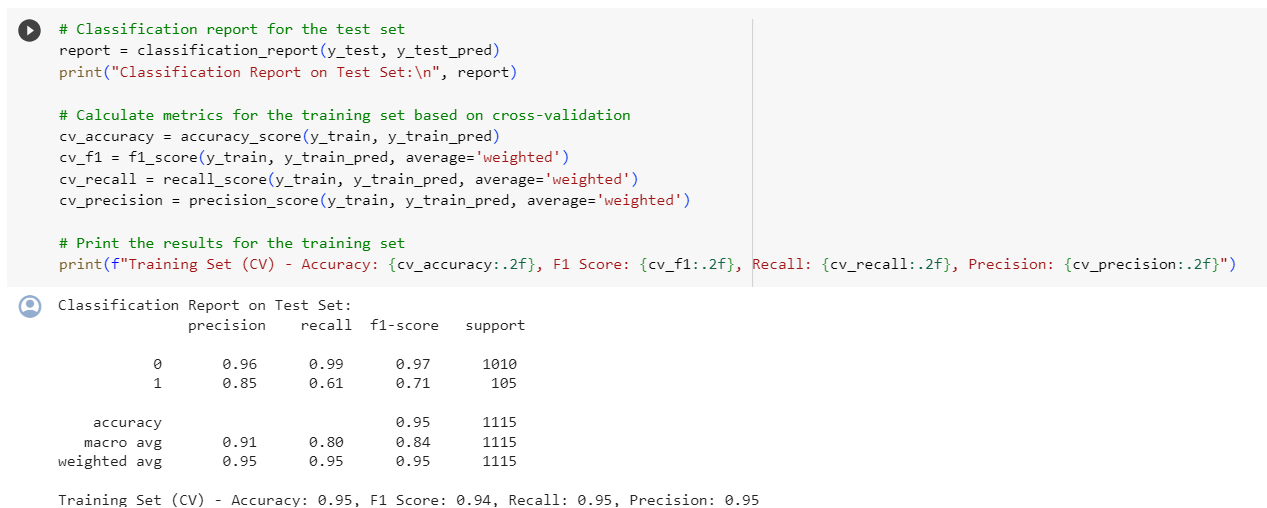

##Approach 2

We also explored using the Boruta Shadow variables as part of feature engineering. This helped to reduce the number of parameters that were used as predictors from 770 to 387 predictors. However, with these predictors, XGBoost model gave us the highest F-1 score of 0.64 (64%), which did not perform better relative to the base Logistic Regression model (F-1 score at 0.67).


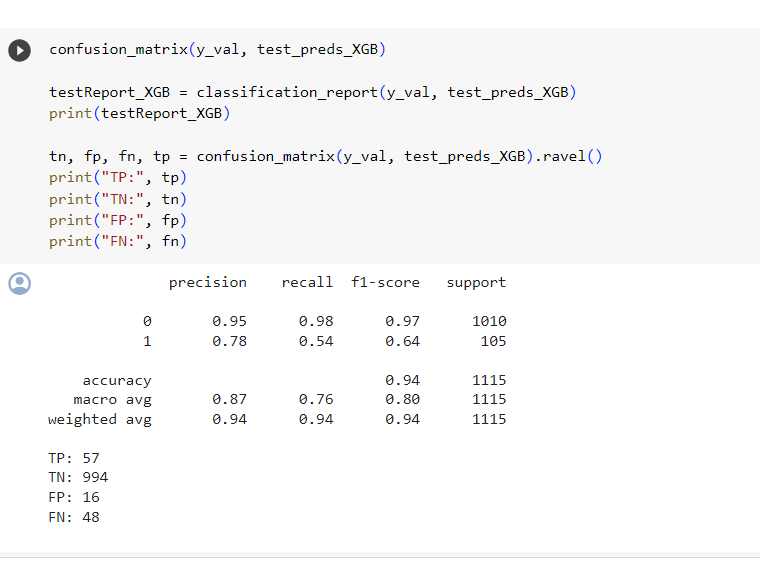

## Approach 3

We also explored randomly selecting 200 parameters with the Stacking Classifier to be used as predictors. However, the F-1 score was found to be 0.67 (67%).


 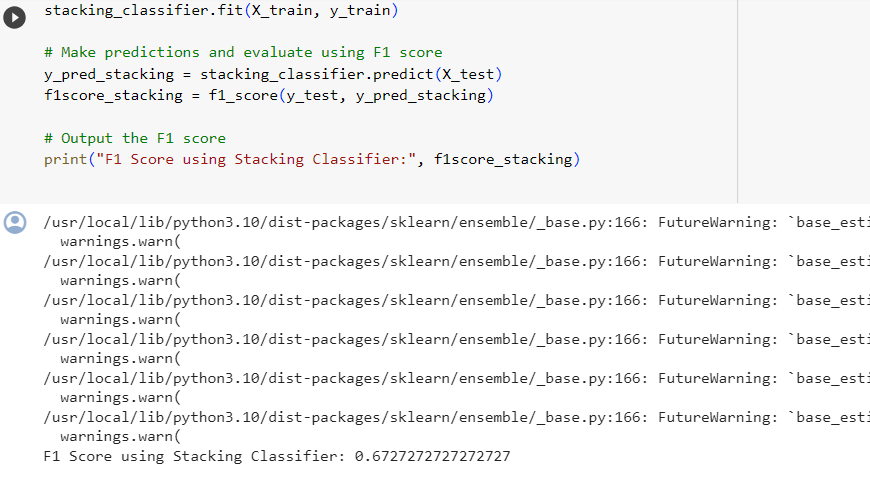




## Approach 4

We also explored using a simple MLP classifier model with all the parameters from the dataset as the predictors. Given that all the information from the dataset was at use, the F-1 score improved and was around 0.68 (68%).


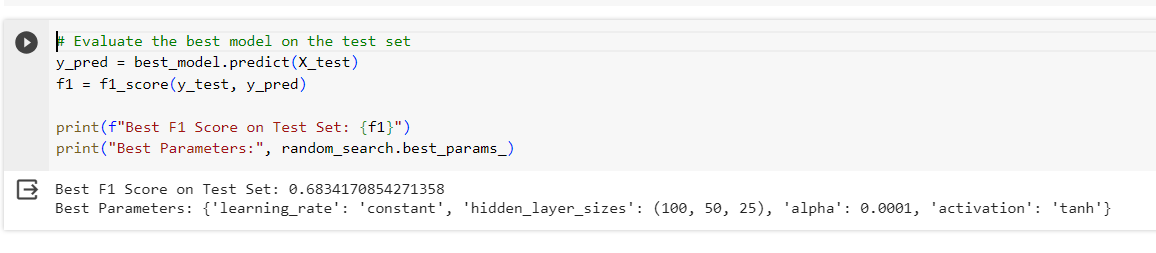